# **GENERAL MOTORS: Providing Insights to Chief in Electric and Hybrid Vehicles**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors.  The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.

# **PACE Stages**

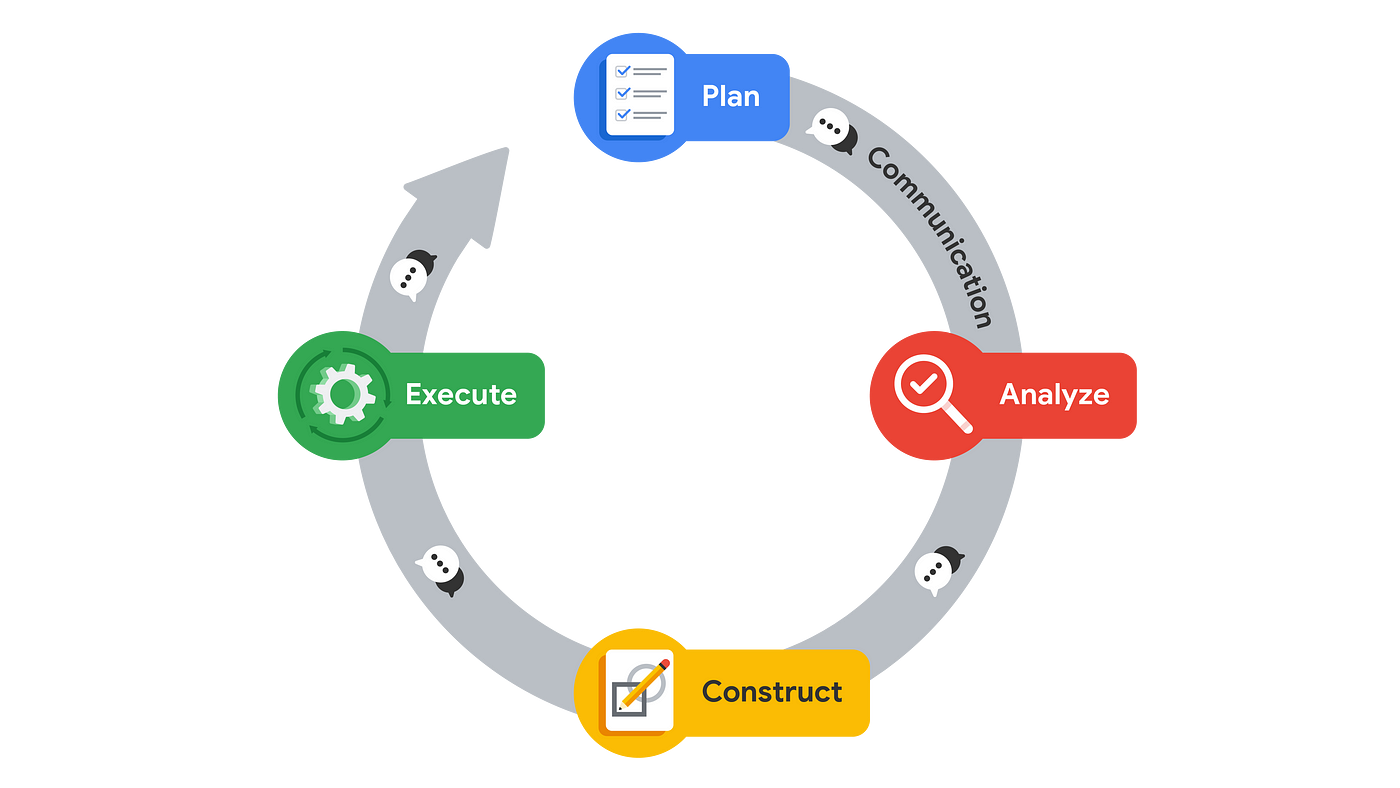
Plan: The planning stage is where you conceptualize the scope of the project and develop the steps that will guide you through the process of completing a project. Here are a few planning stage tasks:
- Research business data
- Define the project scope
- Develop a workflow
- Assess project and/or stakeholder needs

Analyze: The analyzing stage is where you will collect, prepare, and analyze all of the data for your project. Here are a few analyzing stage tasks:
- Format database
- Scrub data
- Convert data into usable formats

Construct: In the construction stage you will build models that will allow you access to hidden relationships locked within data. Here are a few construction stage tasks:
- Select modeling approach
- Build models
- Build machine learning algorithms

Execute: In the execution stage you will present the finding of your analysis, receive feedback, and make revisions as necessary. Here are a few execution stage tasks:
- Share results
- Present findings to other stakeholders
- Address feedback

# **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

## Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

## Familiarize yourself with the HR dataset 

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project? 
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage? 

## Step 1. Imports

*   Import packages
*   Load dataset

### Import Packages

In [84]:
# Import packages
## For data manipulation
import numpy as np
import pandas as pd
## For date and time manipulation
import datetime as dt
## For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

### Load Data

In [85]:
# sales by state
sales_by_states = pd.read_csv("C:/Users/PC/Downloads/General_Motors-Provide_Insights_to_Chief_in_Electric_and_Hybrid_Vehicles/data/raw_data/electric_vehicle_sales_by_state.csv")
# sales by maker
sales_by_makers = pd.read_csv("C:/Users/PC/Downloads/General_Motors-Provide_Insights_to_Chief_in_Electric_and_Hybrid_Vehicles/data/raw_data/electric_vehicle_sales_by_makers.csv")
# dim_date
dim_date = pd.read_csv("C:/Users/PC/Downloads/General_Motors-Provide_Insights_to_Chief_in_Electric_and_Hybrid_Vehicles/data/raw_data/dim_date.csv")

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers) 

### Electric Vehicle Sales by State DataFrame
In this [dataset](link_git_hub), there are 2445 rows, 5 columns, and these variables: 

Variable    |   Description| 
-----|-----|
date|The date on which the data was recorded. Format: DD-MMM-YY. (Data is recorded on a monthly basis)
state|The name of the state where the sales data is recorded. This indicates the geographical location within India.
vehicle_category|The category of the vehicle, specifying whether it is a 2-Wheeler or a 4-Wheeler.
electric_vehicles_sold|The number of electric vehicles sold in the specified state and category on the given date.
total_vehicles_sold|The total number of vehicles (including both electric and non-electric) sold in the specified state and category on the given date.

#### Gather basic information about the data

In [86]:
# Gather basic information about the data
sales_by_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    2445 non-null   object
 1   state                   2445 non-null   object
 2   vehicle_category        2445 non-null   object
 3   electric_vehicles_sold  2445 non-null   int64 
 4   total_vehicles_sold     2445 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 95.6+ KB


In [87]:
# top records
sales_by_states.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229


In [88]:
# last record
sales_by_states.tail()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
2440,01-Mar-24,Mizoram,2-Wheelers,58,1932
2441,01-Mar-24,DNH and DD,2-Wheelers,25,780
2442,01-Mar-24,Manipur,2-Wheelers,13,1394
2443,01-Mar-24,Andaman & Nicobar Island,2-Wheelers,2,447
2444,01-Mar-24,Nagaland,2-Wheelers,2,1180


#### Rename Columns
Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [89]:
# Display all column names
sales_by_states.columns

Index(['date', 'state', 'vehicle_category', 'electric_vehicles_sold',
       'total_vehicles_sold'],
      dtype='object')

In [90]:
# Rename columns as needed
sales_by_states.rename(columns={
    'vehicle_category':'vehicle_cat',
    'electric_vehicles_sold':'ev_sold',
    'total_vehicles_sold':'total_sold',
}, inplace=True)
# Display all column names after the update
sales_by_states.columns

Index(['date', 'state', 'vehicle_cat', 'ev_sold', 'total_sold'], dtype='object')

#### Gather descriptive statistics about the data

In [91]:
# Gather descriptive statistics about the data
sales_by_states.describe().T

,count,mean,std,min,25%,50%,75%,max
ev_sold,2445.0,845.035174,2185.167744,0.0,2.0,54.0,534.0,26668.0
total_sold,2445.0,23402.966053,38353.266389,1.0,1158.0,6098.0,29396.0,387983.0


#### Check Unique values
Check for how many unique values in the data.

In [92]:
# check for unique values
sales_by_states.nunique()

date             36
state            35
vehicle_cat       2
ev_sold         921
total_sold     2225
dtype: int64

In [93]:
# check unique values in vehicle category column
print(f"{sales_by_states['vehicle_cat'].unique()}")
print(f"Number of Unique Vehicle Category in Data is {sales_by_states['vehicle_cat'].unique().shape[0]}")

['2-Wheelers' '4-Wheelers']
Number of Unique Vehicle Category in Data is 2


In [94]:
# check unique values in state column
print(f"{sales_by_states['state'].unique()}")
print(f"Number of Unique State in Data is {sales_by_states['state'].unique().shape[0]}")

['Sikkim' 'Andaman & Nicobar Island' 'Arunachal Pradesh' 'Assam'
 'Chhattisgarh' 'DNH and DD' 'Jammu and Kashmir' 'Ladakh' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Puducherry' 'Tripura' 'Bihar'
 'Chandigarh' 'Delhi' 'Madhya Pradesh' 'Odisha' 'Punjab' 'Uttarakhand'
 'Himachal Pradesh' 'Andaman & Nicobar' 'Haryana' 'Jharkhand'
 'Andhra Pradesh' 'Goa' 'Gujarat' 'Karnataka' 'Kerala' 'Maharashtra'
 'Rajasthan' 'Tamil Nadu' 'Uttar Pradesh' 'West Bengal']
Number of Unique State in Data is 35


#### Cleaning Text Data
Text needs to be free of spelling mistakes, extra spaces, or special characters.

In [95]:
# List of columns to clean
object_list = ['state', 'vehicle_cat']

# Remove spaces at the beginning and end of the string
sales_by_states[object_list] = sales_by_states[object_list].apply(lambda x: x.str.strip())

# Convert text to lowercase
sales_by_states[object_list] = sales_by_states[object_list].apply(lambda x: x.str.lower())

#### Check Missing Values

In [96]:
# Check for missing values
sales_by_states.isnull().sum()

date           0
state          0
vehicle_cat    0
ev_sold        0
total_sold     0
dtype: int64

**Comments:**
There are no missing values in the data.

#### Check Duplicates

In [97]:
# Check for duplicates values
print(f"Number of Duplicate Value in Data is {sales_by_states.duplicated().sum()}")

Number of Duplicate Value in Data is 0


**Comments:**
There are no duplicate values in the data.

#### Check Outliers

In [98]:
# determine the number of rows containing outliers
def check_outlier(df, column):
    """
    Check and identify outliers in a specified column of a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data to be checked.
        column (str): The name of the column in the DataFrame to check for outliers.

    Returns:
        pd.DataFrame: A DataFrame containing statistical indices, including:
            - lower_bound (float): The lower threshold to identify outliers.
            - upper_bound (float): The upper threshold to identify outliers.
            - total_outliers (int): The total number of outlier values in the column.
            - percent_outliers (float): The percentage of outlier values in the column.

    Notes:
        Outliers are identified based on the inter-quartile range (IQR) of the data.
        Values falling outside the lower and upper thresholds are considered outliers.
    """

    # Compute the 25th percentile values
    Q1 = df[column].quantile(0.25)
    # Compute the 75th percentile values
    Q3 = df[column].quantile(0.75)
    # Compute the inter-quartile range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper thresholds to identify outliers
    lower_limit = Q1 - 1.5 * IQR # Lower threshold
    upper_limit = Q3 + 1.5 * IQR # Upper threshold

    # Calculate the total row of data
    total_row = df.shape[0]
    # Calculate the total number of outliers
    total_outlier = (df[df[column] > upper_limit].shape[0]) + (df[df[column] < lower_limit].shape[0])
    # Calculate the percentage of outliers
    percent_outlier = round(((df[df[column] > upper_limit].shape[0]) + (df[df[column] < lower_limit].shape[0])) / df.shape[0] * 100, 2)
    
    # Create a DataFrame containing statistical indices
    result = pd.DataFrame({
        'lower_bound': [lower_limit],
        'upper_bound': [upper_limit],
        'total_row': [total_row],
        'outlier_row':[total_outlier],
        'outliers_pct': [percent_outlier]
    })

    # returns the calculated values
    return result

##### Checking Outlier of 'electric_vehicles_sold' column in DataFrame

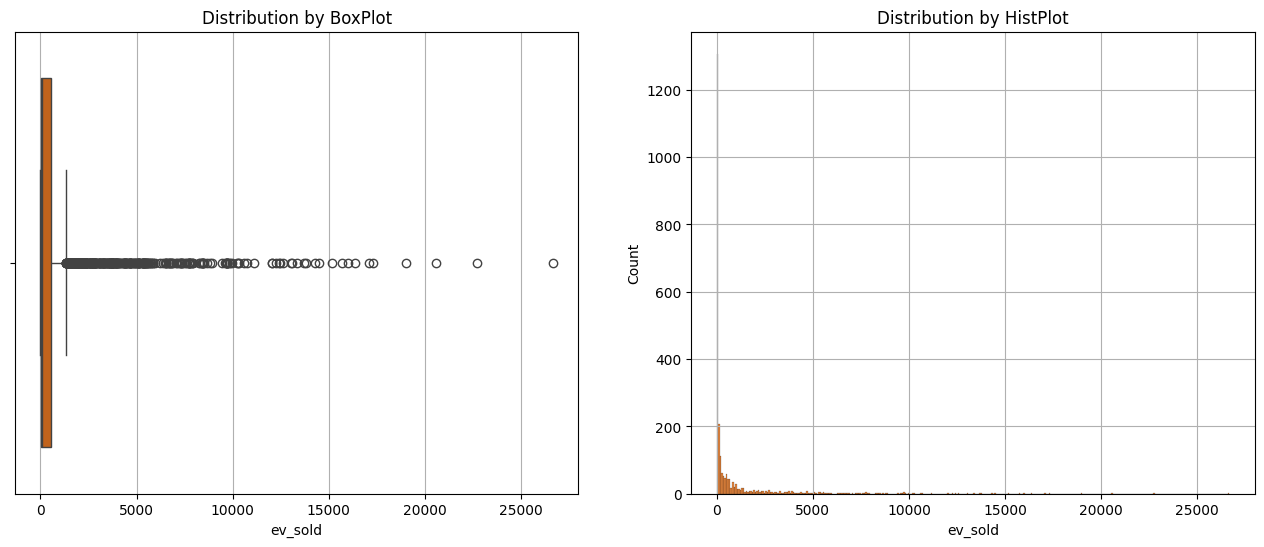

The Skew of Sold Quantity Data is: 4.71


In [99]:
# Create a BoxPlot and HistPlot to visualize distribution of 'ev_sold' and detect any outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=sales_by_states, x='ev_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=sales_by_states, x='ev_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# Display the chart
plt.show()
# Check the skewness of data in the "ev_sold" column
print(f"The Skew of Sold Quantity Data is: {round(sales_by_states['ev_sold'].skew(), 2)}")

In [100]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
state_sold_limit = check_outlier(sales_by_states, 'ev_sold')
# Display the required information
state_sold_limit

,lower_bound,upper_bound,total_row,outlier_row,outliers_pct
0,-796.0,1332.0,2445,360,14.72


**Comments:**

- The data in the electric vehicles sold column has a lower limit of -796, and an upper limit of 1332. With 360 rows as outliers, accounting for 14.72% of total rows.

- Based on the data distribution in the previous electric vehicles sold column we learned about, the data is skewed to the right. Therefore, we will only focus on further exploration of the upper limit.

Let's move on

In [101]:
# Filter rows with electric vehicles sold quantity greater than upper limit
state_sold_outlier = sales_by_states[sales_by_states['ev_sold']>state_sold_limit['upper_bound'].values[0]]
# count the outlier electric vehicles sold values in each vehicle category
for i in state_sold_outlier['vehicle_cat'].unique():
    print(
        f"The number of Electric vehicles sold outliers for {i} vehicles category is {state_sold_outlier[state_sold_outlier['vehicle_cat']==i]['vehicle_cat'].count()}"
          )

The number of Electric vehicles sold outliers for 4-wheelers vehicles category is 8
The number of Electric vehicles sold outliers for 2-wheelers vehicles category is 352


**Comments:**

As the data shows, out of 360 outliers, 352 outliers come from 2-Wheelers. Let's explore what this vehicle category has to offer.

Let's go.

##### Explore "2-Wheelers" Vehicles Category

In [102]:
# filter rows with 'vehicles category' is "2-Wheelers"
state_2_wh = sales_by_states[sales_by_states['vehicle_cat']=='2-wheelers']
# check statistics values
state_2_wh.groupby(['state']).agg(
    min=('ev_sold','min'),
    mean=('ev_sold','mean'),
    median=('ev_sold','median'),
    max=('ev_sold','max')
).reset_index()

,state,min,mean,median,max
0,andaman & nicobar,2,2.000000,2.0,2
1,andaman & nicobar island,0,1.000000,0.0,10
2,andhra pradesh,201,2058.305556,1909.5,7057
3,arunachal pradesh,0,0.111111,0.0,2
4,assam,0,165.638889,172.0,767
5,bihar,8,833.888889,768.0,2584
6,chandigarh,0,101.500000,98.5,362
7,chhattisgarh,6,1441.361111,1378.5,3880
8,delhi,0,2477.166667,2497.5,5380
9,dnh and dd,0,7.805556,5.0,31


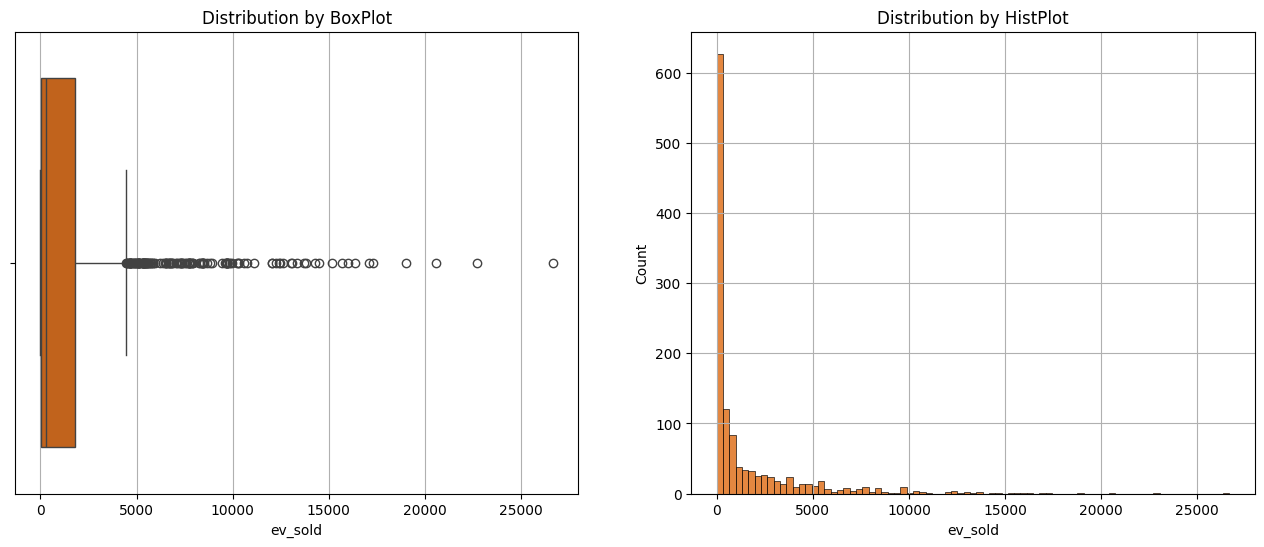

The Skew of 2-Wheelers Sold Data is: 3.27


In [103]:
# Create a BoxPlot and HistPlot to visualize distribution of 'ev_sold' and detect any outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=state_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=state_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# plot the chart
plt.show()
# Check the skewness of data in the "sold_quantity" column
print(f"The Skew of 2-Wheelers Sold Data is: {round(state_2_wh['ev_sold'].skew(), 2)}")

In [104]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
state_2_wh_sold_limit = check_outlier(state_2_wh, 'ev_sold')
# Display the required information
state_2_wh_sold_limit

,lower_bound,upper_bound,total_row,outlier_row,outliers_pct
0,-2663.0,4457.0,1223,138,11.28


In [105]:
# Filter rows with electric vehicles sold quantity greater than upper bound of electric vehicles sold
state_2_wh_sold_outlier = state_2_wh[state_2_wh['ev_sold']>state_2_wh_sold_limit['upper_bound'].values[0]]
# count the outlier electric vehicles sold values in each state
for i in state_2_wh_sold_outlier['state'].unique():
    print(
        f"The number of Electric vehicles sold outliers for {i} State is {state_2_wh_sold_outlier[state_2_wh_sold_outlier['state']==i]['state'].count()}"
          )

The number of Electric vehicles sold outliers for maharashtra State is 28
The number of Electric vehicles sold outliers for karnataka State is 26
The number of Electric vehicles sold outliers for tamil nadu State is 23
The number of Electric vehicles sold outliers for gujarat State is 22
The number of Electric vehicles sold outliers for rajasthan State is 14
The number of Electric vehicles sold outliers for kerala State is 13
The number of Electric vehicles sold outliers for delhi State is 3
The number of Electric vehicles sold outliers for uttar pradesh State is 6
The number of Electric vehicles sold outliers for madhya pradesh State is 2
The number of Electric vehicles sold outliers for andhra pradesh State is 1


**Comment:**

As the data shows, the majority of outliers come from:

['Maharashtra', 'Karnataka', 'Tamil Nadu', 'Gujarat', 'Rajasthan', 'Kerala', 'Uttar Pradesh']

We will now explore each of these values. Let's go

##### Explore "Maharashtra" State

In [106]:
# filter rows with 'Maharashtra' State
maharashtra_2_wh = state_2_wh[state_2_wh['state']=='maharashtra']
# check statistics values
maharashtra_2_wh.groupby(['state']).agg(
    min=('ev_sold','min'),
    mean=('ev_sold','mean'),
    median=('ev_sold','median'),
    max=('ev_sold','max')
).reset_index()

,state,min,mean,median,max
0,maharashtra,189,10104.583333,9772.5,26668


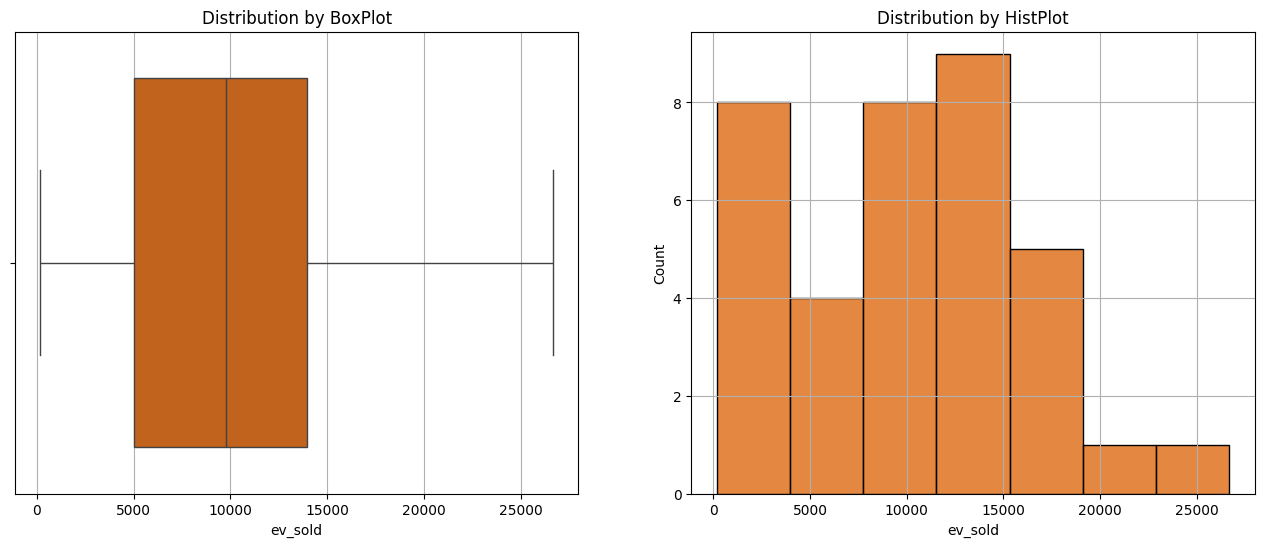

The Skew of 2-Wheelers Sold Data is: 0.34


In [107]:
# Create a BoxPlot and HistPlot to visualize distribution of 'ev_sold' and detect any outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=maharashtra_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=maharashtra_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# plot the chart
plt.show()
# Check the skewness of data in the "sold_quantity" column
print(f"The Skew of 2-Wheelers Sold Data is: {round(maharashtra_2_wh['ev_sold'].skew(), 2)}")

In [108]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
maharashtra_2_wh_sold_limit = check_outlier(maharashtra_2_wh, 'ev_sold')
# Display the required information
maharashtra_2_wh_sold_limit

,lower_bound,upper_bound,total_row,outlier_row,outliers_pct
0,-8344.75,27367.25,36,0,0.0


##### Explore "Karnataka" State

In [109]:
# filter rows with 'Karnataka' State
karnataka_2_wh = state_2_wh[state_2_wh['state']=='karnataka']
# check statistics values
karnataka_2_wh.groupby(['state']).agg(
    min=('ev_sold','min'),
    mean=('ev_sold','mean'),
    median=('ev_sold','median'),
    max=('ev_sold','max')
).reset_index()

,state,min,mean,median,max
0,karnataka,140,8120.25,7740.0,22742


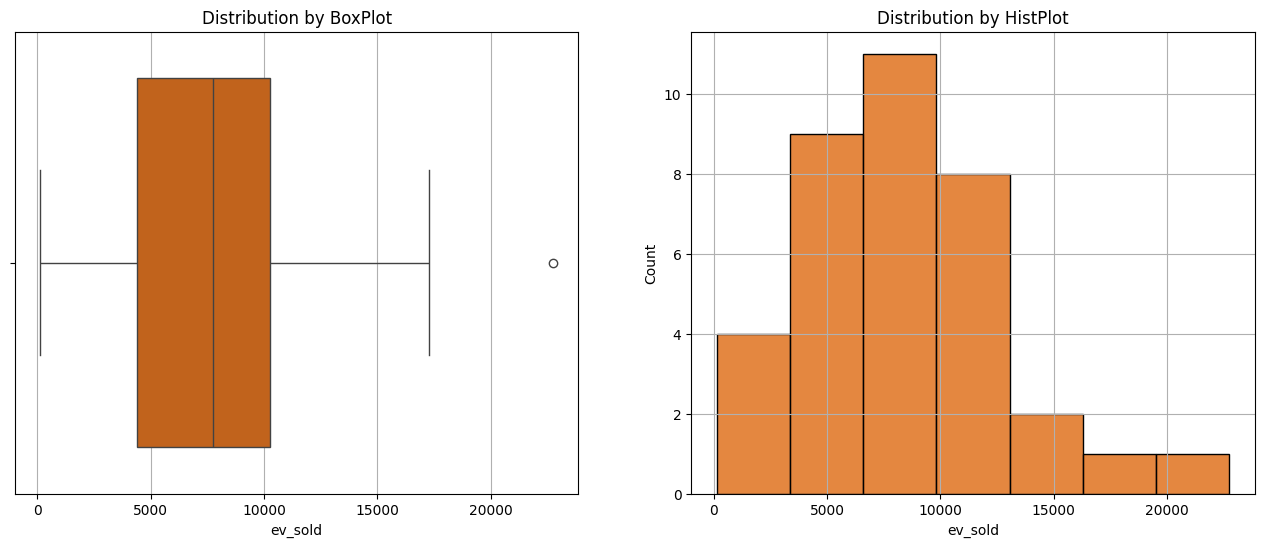

The Skew of 2-Wheelers Sold Data is: 0.79


In [110]:
# Create a BoxPlot and HistPlot to visualize distribution of 'ev_sold' and detect any outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=karnataka_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=karnataka_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# plot the chart
plt.show()
# Check the skewness of data in the "sold_quantity" column
print(f"The Skew of 2-Wheelers Sold Data is: {round(karnataka_2_wh['ev_sold'].skew(), 2)}")

In [111]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
karnataka_2_wh_sold_limit = check_outlier(karnataka_2_wh, 'ev_sold')
# Display the required information
karnataka_2_wh_sold_limit

,lower_bound,upper_bound,total_row,outlier_row,outliers_pct
0,-4404.5,19033.5,36,1,2.78


In [112]:
# Display rows that are outliers
karnataka_2_wh[karnataka_2_wh['ev_sold']>karnataka_2_wh_sold_limit['upper_bound'].values[0]]

,date,state,vehicle_cat,ev_sold,total_sold
2417,01-Mar-24,karnataka,2-wheelers,22742,123800


##### Explore "Tamil Nadu" State

In [113]:
# filter rows with 'Tamil Nadu' State
tamil_nadu_2_wh = state_2_wh[state_2_wh['state']=='tamil nadu']
# check statistics values
tamil_nadu_2_wh.groupby(['state']).agg(
    min=('ev_sold','min'),
    mean=('ev_sold','mean'),
    median=('ev_sold','median'),
    max=('ev_sold','max')
).reset_index()

,state,min,mean,median,max
0,tamil nadu,237,5245.972222,5242.0,13350


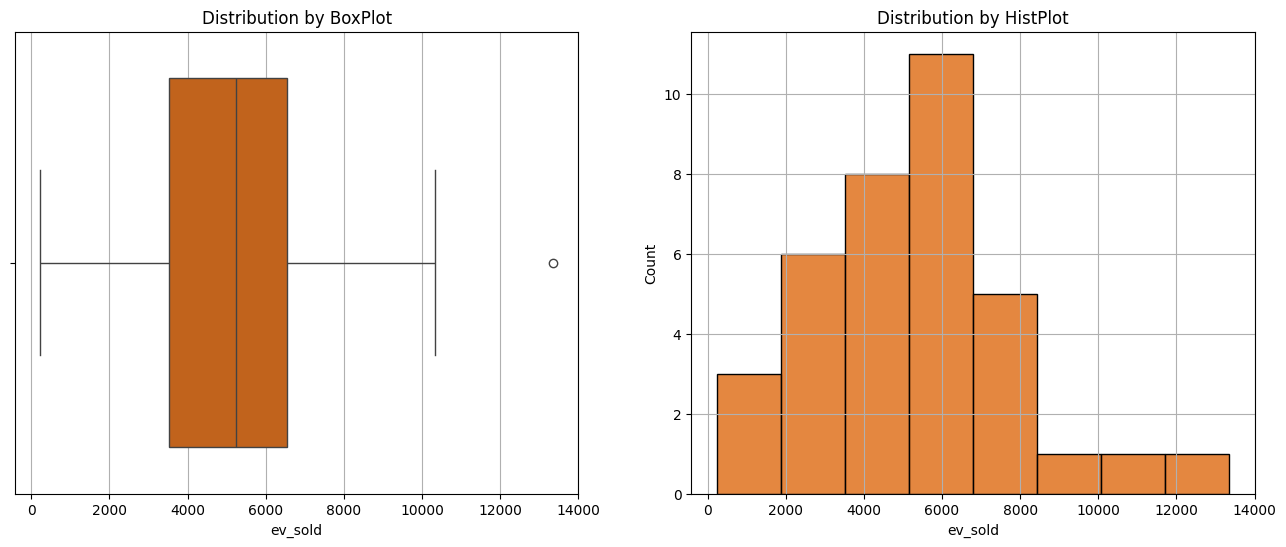

The Skew of 2-Wheelers Sold Data is: 0.67


In [114]:
# Create a BoxPlot and HistPlot to visualize distribution of 'ev_sold' and detect any outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=tamil_nadu_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=tamil_nadu_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# plot the chart
plt.show()
# Check the skewness of data in the "sold_quantity" column
print(f"The Skew of 2-Wheelers Sold Data is: {round(tamil_nadu_2_wh['ev_sold'].skew(), 2)}")

In [115]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
tamil_nadu_2_wh_sold_limit = check_outlier(tamil_nadu_2_wh, 'ev_sold')
# Display the required information
tamil_nadu_2_wh_sold_limit

,lower_bound,upper_bound,total_row,outlier_row,outliers_pct
0,-1010.5,11097.5,36,1,2.78


In [116]:
# Display rows that are outliers
tamil_nadu_2_wh[tamil_nadu_2_wh['ev_sold']>tamil_nadu_2_wh_sold_limit['upper_bound'].values[0]]

,date,state,vehicle_cat,ev_sold,total_sold
2418,01-Mar-24,tamil nadu,2-wheelers,13350,124071


##### Explore "Gujarat" State

In [117]:
# filter rows with 'Maharashtra' State
gujarat_2_wh = state_2_wh[state_2_wh['state']=='gujarat']
# check statistics values
gujarat_2_wh.groupby(['state']).agg(
    min=('ev_sold','min'),
    mean=('ev_sold','mean'),
    median=('ev_sold','median'),
    max=('ev_sold','max')
).reset_index()

,state,min,mean,median,max
0,gujarat,98,4709.916667,5311.0,9609


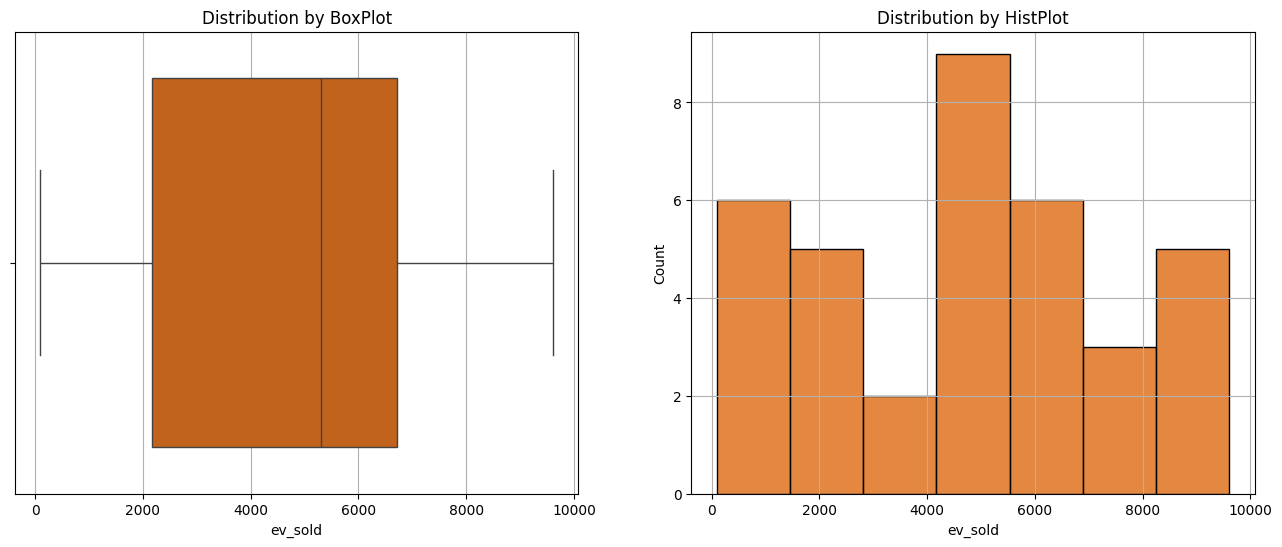

The Skew of 2-Wheelers Sold Data is: -0.25


In [118]:
# Create a BoxPlot and HistPlot to visualize distribution of 'ev_sold' and detect any outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=gujarat_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=gujarat_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# plot the chart
plt.show()
# Check the skewness of data in the "sold_quantity" column
print(f"The Skew of 2-Wheelers Sold Data is: {round(gujarat_2_wh['ev_sold'].skew(), 2)}")

In [119]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
gujarat_2_wh_sold_limit = check_outlier(gujarat_2_wh, 'ev_sold')
# Display the required information
gujarat_2_wh_sold_limit

,lower_bound,upper_bound,total_row,outlier_row,outliers_pct
0,-4638.25,13519.75,36,0,0.0


##### Explore "Rajasthan" State

In [120]:
# filter rows with 'Maharashtra' State
rajasthan_2_wh = state_2_wh[state_2_wh['state']=='rajasthan']
# check statistics values
rajasthan_2_wh.groupby(['state']).agg(
    min=('ev_sold','min'),
    mean=('ev_sold','mean'),
    median=('ev_sold','median'),
    max=('ev_sold','max')
).reset_index()

,state,min,mean,median,max
0,rajasthan,33,3956.25,4036.5,9455


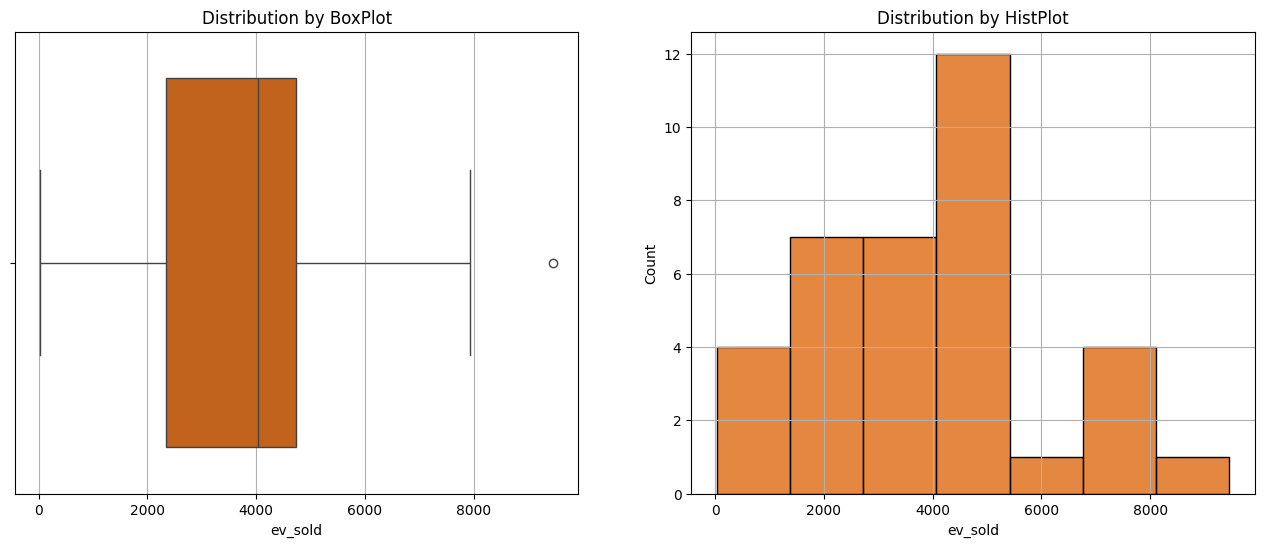

The Skew of 2-Wheelers Sold Data is: 0.4


In [121]:
# Create a BoxPlot and HistPlot to visualize distribution of 'ev_sold' and detect any outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=rajasthan_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=rajasthan_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# plot the chart
plt.show()
# Check the skewness of data in the "sold_quantity" column
print(f"The Skew of 2-Wheelers Sold Data is: {round(rajasthan_2_wh['ev_sold'].skew(), 2)}")

In [122]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
rajasthan_2_wh_sold_limit = check_outlier(rajasthan_2_wh, 'ev_sold')
# Display the required information
rajasthan_2_wh_sold_limit

,lower_bound,upper_bound,total_row,outlier_row,outliers_pct
0,-1262.625,8332.375,36,1,2.78


In [123]:
# Display rows that are outliers
rajasthan_2_wh[rajasthan_2_wh['ev_sold']>rajasthan_2_wh_sold_limit['upper_bound'].values[0]]

,date,state,vehicle_cat,ev_sold,total_sold
1941,01-Oct-22,rajasthan,2-wheelers,9455,133585


##### Explore "Kerala" State

In [124]:
# filter rows with 'Maharashtra' State
kerala_2_wh = state_2_wh[state_2_wh['state']=='kerala']
# check statistics values
kerala_2_wh.groupby(['state']).agg(
    min=('ev_sold','min'),
    mean=('ev_sold','mean'),
    median=('ev_sold','median'),
    max=('ev_sold','max')
).reset_index()

,state,min,mean,median,max
0,kerala,95,3349.805556,3364.5,8393


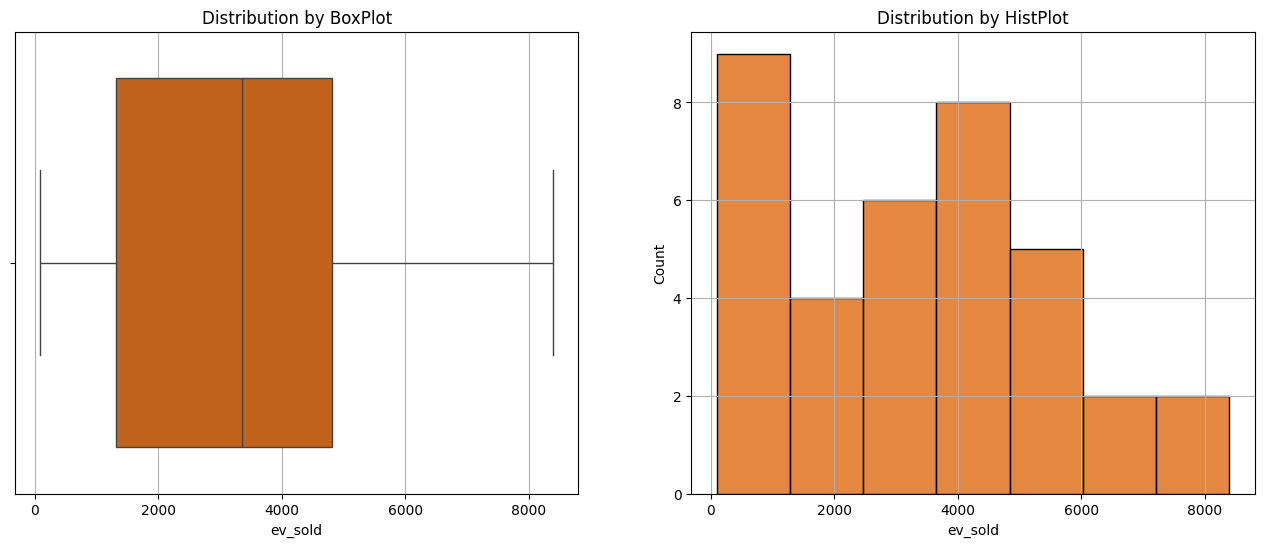

The Skew of 2-Wheelers Sold Data is: 0.28


In [125]:
# Create a BoxPlot and HistPlot to visualize distribution of 'ev_sold' and detect any outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=kerala_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=kerala_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# plot the chart
plt.show()
# Check the skewness of data in the "sold_quantity" column
print(f"The Skew of 2-Wheelers Sold Data is: {round(kerala_2_wh['ev_sold'].skew(), 2)}")

In [126]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
kerala_2_wh_sold_limit = check_outlier(kerala_2_wh, 'ev_sold')
# Display the required information
kerala_2_wh_sold_limit

,lower_bound,upper_bound,total_row,outlier_row,outliers_pct
0,-3907.5,10048.5,36,0,0.0


##### Explore "Uttar Pradesh" State

In [127]:
# filter rows with 'Maharashtra' State
uttar_pradesh_2_wh = state_2_wh[state_2_wh['state']=='uttar pradesh']
# check statistics values
uttar_pradesh_2_wh.groupby(['state']).agg(
    min=('ev_sold','min'),
    mean=('ev_sold','mean'),
    median=('ev_sold','median'),
    max=('ev_sold','max')
).reset_index()

,state,min,mean,median,max
0,uttar pradesh,25,2476.805556,1960.0,7799


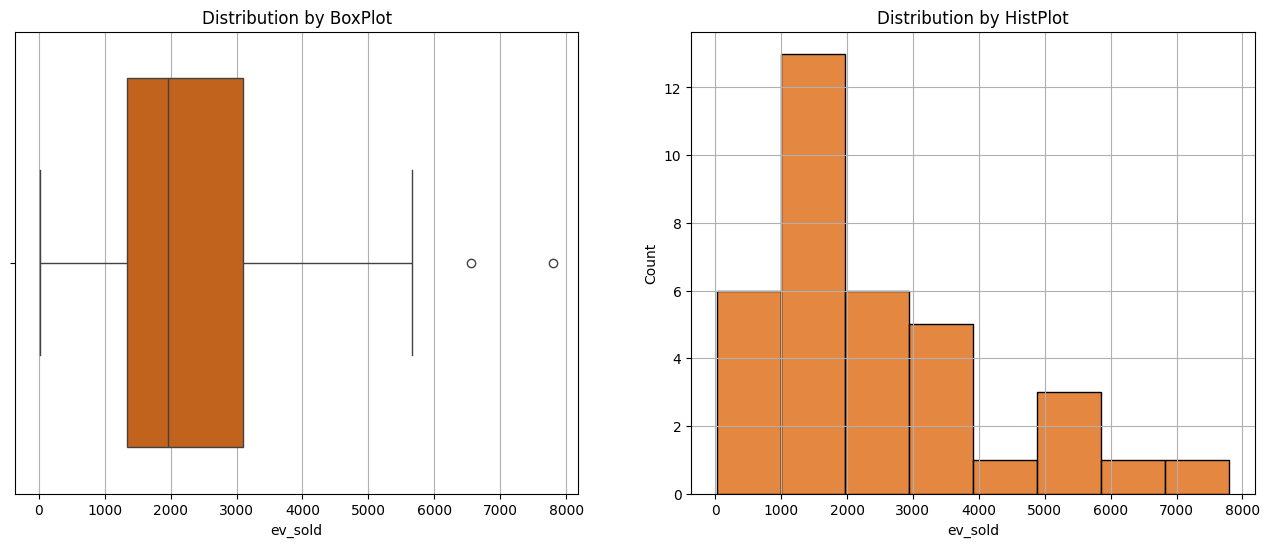

The Skew of 2-Wheelers Sold Data is: 1.12


In [128]:
# Create a BoxPlot and HistPlot to visualize distribution of 'ev_sold' and detect any outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=uttar_pradesh_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=uttar_pradesh_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# plot the chart
plt.show()
# Check the skewness of data in the "sold_quantity" column
print(f"The Skew of 2-Wheelers Sold Data is: {round(uttar_pradesh_2_wh['ev_sold'].skew(), 2)}")

In [129]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
uttar_pradesh_2_wh_sold_limit = check_outlier(uttar_pradesh_2_wh, 'ev_sold')
# Display the required information
uttar_pradesh_2_wh_sold_limit

,lower_bound,upper_bound,total_row,outlier_row,outliers_pct
0,-1298.875,5740.125,36,2,5.56


In [130]:
# Display rows that are outliers
uttar_pradesh_2_wh[uttar_pradesh_2_wh['ev_sold']>uttar_pradesh_2_wh_sold_limit['upper_bound'].values[0]]

,date,state,vehicle_cat,ev_sold,total_sold
2385,01-Feb-24,uttar pradesh,2-wheelers,6557,206846
2416,01-Mar-24,uttar pradesh,2-wheelers,7799,210216


##### Handling Outliers

In [131]:
# handling outlier values and save resulting DataFrame
## code here

# display first few rows of new DataFrame as needed
# sales_by_states.head()

**Comment:**
- After thorough examination, I noticed that the outliers in the electric_vehicles_sold variable appeared due to differences between states. Some states have much higher sales than others, which caused the values from these states to be considered outliers in the overall dataset. However, when analyzing each state individually, these values are not outliers but normal sales levels for states with higher sales.

- A few remaining outliers tend to be close to the upper limit and do not significantly affect the data distribution, as the skewness of the states is very small (less than 1). Therefore, removing or adjusting these outliers would result in losing important information about the natural differences between states.

For these reasons, I decided to retain and not handle these outliers in the analysis to ensure the data accurately reflects the distribution nature of each state.

#### Restore Columns


In [132]:
# Display all column names
sales_by_states.columns

Index(['date', 'state', 'vehicle_cat', 'ev_sold', 'total_sold'], dtype='object')

In [133]:
# Rename columns as needed
sales_by_states.rename(columns={
    'vehicle_cat':'vehicle_category',
    'ev_sold':'electric_vehicles_sold',
    'total_sold':'total_vehicles_sold',
}, inplace=True)
# Display all column names after the update
sales_by_states.columns

Index(['date', 'state', 'vehicle_category', 'electric_vehicles_sold',
       'total_vehicles_sold'],
      dtype='object')

#### Sorting Data
Once you have cleaned your data, sorting is a necessary step to make it easier to analyze.

In [134]:
# Sort values by ['date','state','vehicle_category'] columns
sales_by_states = sales_by_states.sort_values(by=['date','state','vehicle_category'], ascending=True).reset_index(drop=True)

#### Fixing Data Types
Convert data types to appropriate form.

In [135]:
# Convert date column from string to datetime
sales_by_states['date'] = pd.to_datetime(sales_by_states['date'])

# Convert object columns to category to optimize memory usage and improve processing speed
sales_by_states['state'] = sales_by_states['state'].astype('category')
sales_by_states['vehicle_category'] = sales_by_states['vehicle_category'].astype('category')

C:\Users\PC\AppData\Local\Temp\ipykernel_7820\2928264042.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_by_states['date'] = pd.to_datetime(sales_by_states['date'])


### Electric Vehicle Sales by Makers
In this [dataset](link_git_hub), there are 816 rows, 4 columns, and these variables: 

Variable    |   Description| 
-----|-----|
date|The date on which the sales data was recorded. Format: DD-MMM-YY. (Data is recorded on a monthly basis)
vehicle_category|The category of the vehicle, specifying whether it is a 2-Wheeler or a 4-Wheeler.
maker|The name of the manufacturer or brand of the electric vehicle.
electric_vehicles_sold|The number of electric vehicles sold by the specified maker in the given category on the given date.

#### Gather basic information about the data

In [136]:
# Gather basic information about the data
sales_by_makers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.6+ KB


In [137]:
# top records
sales_by_makers.head()

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0


In [138]:
# last record
sales_by_makers.tail()

,date,vehicle_category,maker,electric_vehicles_sold
811,01-Mar-24,2-Wheelers,BGAUSS,3070
812,01-Mar-24,2-Wheelers,BATTRE ELECTRIC,625
813,01-Mar-24,2-Wheelers,KINETIC GREEN,3915
814,01-Mar-24,2-Wheelers,REVOLT,585
815,01-Mar-24,2-Wheelers,OTHERS,10579


#### Rename Columns
Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [139]:
# Display all column names
sales_by_makers.columns

Index(['date', 'vehicle_category', 'maker', 'electric_vehicles_sold'], dtype='object')

In [140]:
# Rename columns as needed
sales_by_makers.rename(columns={
    'vehicle_category':'vehicle_cat',
    'electric_vehicles_sold':'ev_sold'
}, inplace=True)
# Display all column names after the update
sales_by_makers.columns

Index(['date', 'vehicle_cat', 'maker', 'ev_sold'], dtype='object')

#### Gather descriptive statistics about the data

In [141]:
# Gather descriptive statistics about the data
sales_by_makers.describe().T

,count,mean,std,min,25%,50%,75%,max
ev_sold,816.0,2531.998775,4771.077333,0.0,42.0,662.0,2636.5,44630.0


#### Check Unique values
Check for how many unique values in the data.

In [142]:
# check for unique values
sales_by_makers.nunique()

date            36
vehicle_cat      2
maker           26
ev_sold        603
dtype: int64

In [143]:
# check unique values in vehicle category column
print(f"{sales_by_makers['vehicle_cat'].unique()}")
print(f"Number of Unique Vehicle Category in Data is {sales_by_makers['vehicle_cat'].unique().shape[0]}")

['2-Wheelers' '4-Wheelers']
Number of Unique Vehicle Category in Data is 2


In [144]:
# check unique values in maker column
print(f"{sales_by_makers['maker'].unique()}")
print(f"Number of Unique Maker in Data is {sales_by_makers['maker'].unique().shape[0]}")

['OLA ELECTRIC' 'OKAYA EV' 'BYD India' 'PCA Automobiles' 'BMW India'
 'Volvo Auto India' 'KIA Motors' 'Mercedes -Benz AG' 'Tata Motors'
 'MG Motor' 'Mahindra & Mahindra' 'Hyundai Motor' 'HERO ELECTRIC'
 'OKINAWA' 'AMPERE' 'ATHER' 'PURE EV' 'TVS' 'REVOLT' 'BAJAJ' 'BEING'
 'JITENDRA' 'OTHERS' 'BGAUSS' 'BATTRE ELECTRIC' 'KINETIC GREEN']
Number of Unique Maker in Data is 26


#### Cleaning Text Data
Text needs to be free of spelling mistakes, extra spaces, or special characters.

In [145]:
# List of columns to clean
object_list = ['maker', 'vehicle_cat']

# Remove spaces at the beginning and end of the string
sales_by_makers[object_list] = sales_by_makers[object_list].apply(lambda x: x.str.strip())

# Convert text to lowercase
sales_by_makers[object_list] = sales_by_makers[object_list].apply(lambda x: x.str.lower())

#### Check Missing Values

In [146]:
# Check for missing values
sales_by_makers.isnull().sum()

date           0
vehicle_cat    0
maker          0
ev_sold        0
dtype: int64

**Comments:**
There are no missing values in the data.

#### Check Duplicates

In [147]:
# Check for duplicates values
print(f"Number of Duplicate Value in Data is {sales_by_makers.duplicated().sum()}")

Number of Duplicate Value in Data is 0


**Comments:**
There are no duplicate values in the data.

#### Check Outliers

##### Checking Outlier of 'electric_vehicles_sold' column in DataFrame

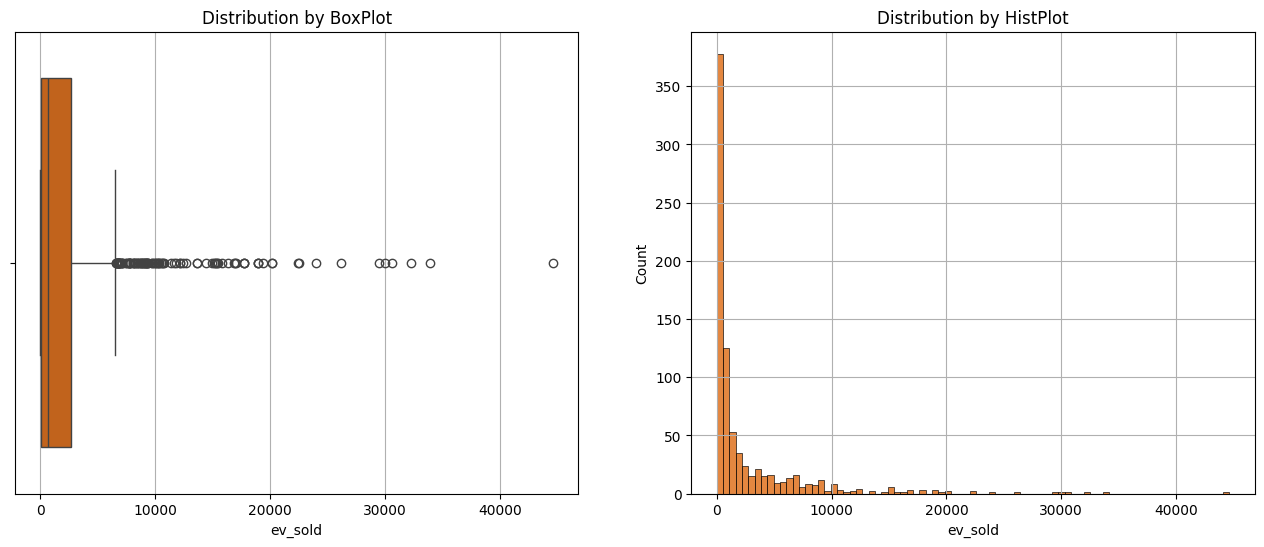

The Skew of Sold Quantity Data is: 3.61


In [148]:
# Create a BoxPlot and HistPlot to visualize distribution of 'ev_sold' and detect any outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=sales_by_makers, x='ev_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=sales_by_makers, x='ev_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# Display the chart
plt.show()
# Check the skewness of data in the "ev_sold" column
print(f"The Skew of Sold Quantity Data is: {round(sales_by_makers['ev_sold'].skew(), 2)}")

In [149]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
maker_sold_limit = check_outlier(sales_by_makers, 'ev_sold')
# Display the required information
maker_sold_limit

,lower_bound,upper_bound,total_row,outlier_row,outliers_pct
0,-3849.75,6528.25,816,104,12.75


**Comments:**

- The data in the electric vehicles sold column has a lower limit of -3849.75, and an upper limit of 6528.25. With 104 rows as outliers, accounting for 12.75% of total rows.

- Based on the data distribution in the previous electric vehicles sold column we learned about, the data is skewed to the right. Therefore, we will only focus on further exploration of the upper limit.

Let's move on

In [150]:
# Filter rows with electric vehicles sold quantity greater than upper limit
maker_sold_outlier = sales_by_makers[sales_by_makers['ev_sold']>maker_sold_limit['upper_bound'].values[0]]
# count the outlier electric vehicles sold values in each vehicle category
for i in maker_sold_outlier['vehicle_cat'].unique():
    print(
        f"The number of Electric vehicles sold outliers for {i} vehicles category is {maker_sold_outlier[maker_sold_outlier['vehicle_cat']==i]['vehicle_cat'].count()}"
          )

The number of Electric vehicles sold outliers for 4-wheelers vehicles category is 1
The number of Electric vehicles sold outliers for 2-wheelers vehicles category is 103


**Comments:**

As the data shows, out of 104 outliers, 103 outliers come from 2-Wheelers. Let's explore what this vehicle category has to offer.

Let's go.

##### Explore "2-Wheelers" Vehicles Category

In [151]:
# filter rows with 'vehicles category' is "2-Wheelers"
maker_2_wh = sales_by_makers[sales_by_makers['vehicle_cat']=='2-wheelers']
# check statistics values
maker_2_wh.groupby(['maker']).agg(
    min=('ev_sold','min'),
    mean=('ev_sold','mean'),
    median=('ev_sold','median'),
    max=('ev_sold','max')
).reset_index()

,maker,min,mean,median,max
0,ampere,147,4646.500000,4398.5,12446
1,ather,160,5679.138889,5828.0,17012
2,bajaj,20,4044.611111,2578.5,17716
3,battre electric,82,403.416667,269.5,1185
4,being,54,766.333333,893.0,1422
5,bgauss,189,1254.250000,1178.5,3070
6,hero electric,170,4733.166667,5695.0,13652
7,jitendra,13,518.250000,528.5,1256
8,kinetic green,201,798.750000,523.0,3915
9,okaya ev,0,1126.500000,1015.0,3831


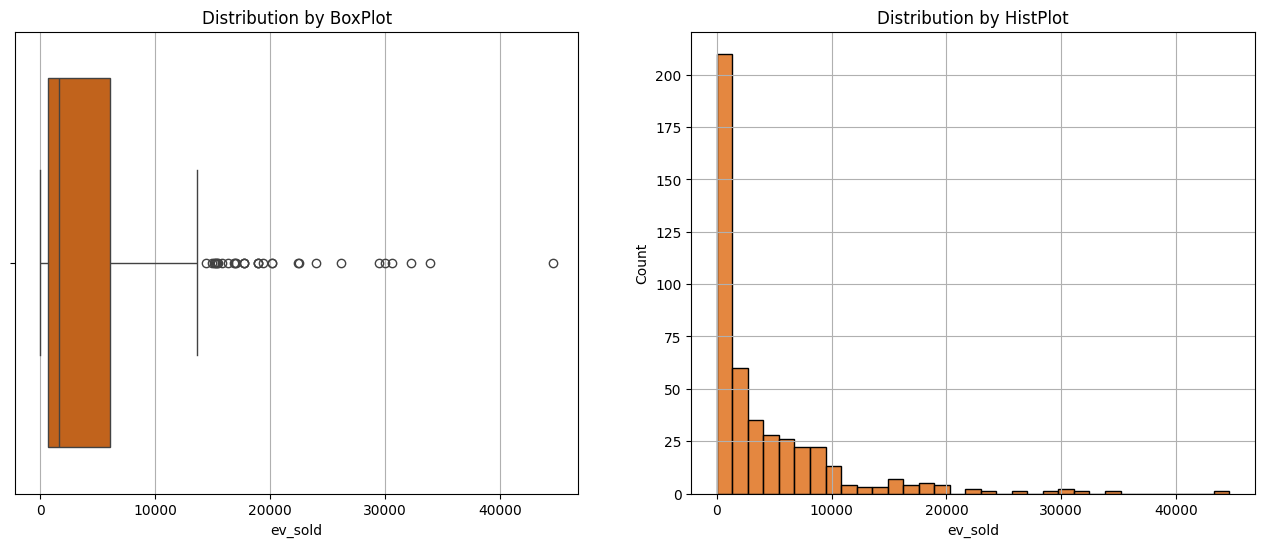

The Skew of 2-Wheelers Sold Data is: 2.76


In [152]:
# Create a BoxPlot and HistPlot to visualize distribution of 'ev_sold' and detect any outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=maker_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=maker_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# plot the chart
plt.show()
# Check the skewness of data in the "sold_quantity" column
print(f"The Skew of 2-Wheelers Sold Data is: {round(maker_2_wh['ev_sold'].skew(), 2)}")

In [153]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
maker_2_wh_sold_limit = check_outlier(maker_2_wh, 'ev_sold')
# Display the required information
maker_2_wh_sold_limit

,lower_bound,upper_bound,total_row,outlier_row,outliers_pct
0,-7382.25,14081.75,456,31,6.8


In [154]:
# Filter rows with electric vehicles sold quantity greater than upper bound of electric vehicles sold
maker_2_wh_sold_outlier = maker_2_wh[maker_2_wh['ev_sold']>maker_2_wh_sold_limit['upper_bound'].values[0]]
# count the outlier electric vehicles sold values in each state
for i in maker_2_wh_sold_outlier['maker'].unique():
    print(
        f"The number of Electric vehicles sold outliers for {i} Maker is {maker_2_wh_sold_outlier[maker_2_wh_sold_outlier['maker']==i]['maker'].count()}"
          )

The number of Electric vehicles sold outliers for ola electric Maker is 18
The number of Electric vehicles sold outliers for tvs Maker is 9
The number of Electric vehicles sold outliers for ather Maker is 2
The number of Electric vehicles sold outliers for okinawa Maker is 1
The number of Electric vehicles sold outliers for bajaj Maker is 1


**Comment:**

As the data shows, the majority of outliers come from:

['ola electric', 'tvs']

We will now explore each of these values. Let's go

##### Explore "ola electric" Maker

In [155]:
# filter rows with 'Maharashtra' State
ola_electric_2_wh = maker_2_wh[maker_2_wh['maker']=='ola electric']
# check statistics values
ola_electric_2_wh.groupby(['maker']).agg(
    min=('ev_sold','min'),
    mean=('ev_sold','mean'),
    median=('ev_sold','median'),
    max=('ev_sold','max')
).reset_index()

,maker,min,mean,median,max
0,ola electric,0,13596.472222,14496.0,44630


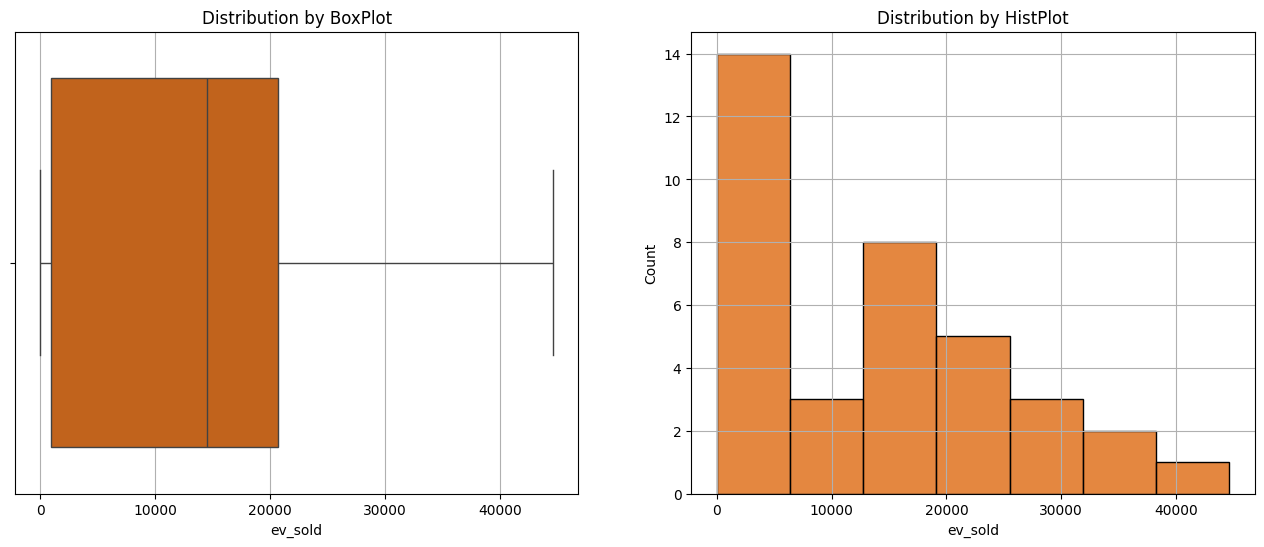

The Skew of 2-Wheelers Sold Data is: 0.56


In [156]:
# Create a BoxPlot and HistPlot to visualize distribution of 'ev_sold' and detect any outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=ola_electric_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=ola_electric_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# plot the chart
plt.show()
# Check the skewness of data in the "sold_quantity" column
print(f"The Skew of 2-Wheelers Sold Data is: {round(ola_electric_2_wh['ev_sold'].skew(), 2)}")

In [157]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
ola_electric_2_wh_sold_limit = check_outlier(ola_electric_2_wh, 'ev_sold')
# Display the required information
ola_electric_2_wh_sold_limit

,lower_bound,upper_bound,total_row,outlier_row,outliers_pct
0,-28840.125,50440.875,36,0,0.0


##### Explore "tvs" Maker

In [158]:
# filter rows with 'Maharashtra' State
tvs_2_wh = maker_2_wh[maker_2_wh['maker']=='tvs']
# check statistics values
tvs_2_wh.groupby(['maker']).agg(
    min=('ev_sold','min'),
    mean=('ev_sold','mean'),
    median=('ev_sold','median'),
    max=('ev_sold','max')
).reset_index()

,maker,min,mean,median,max
0,tvs,9,7571.527778,6123.0,26158


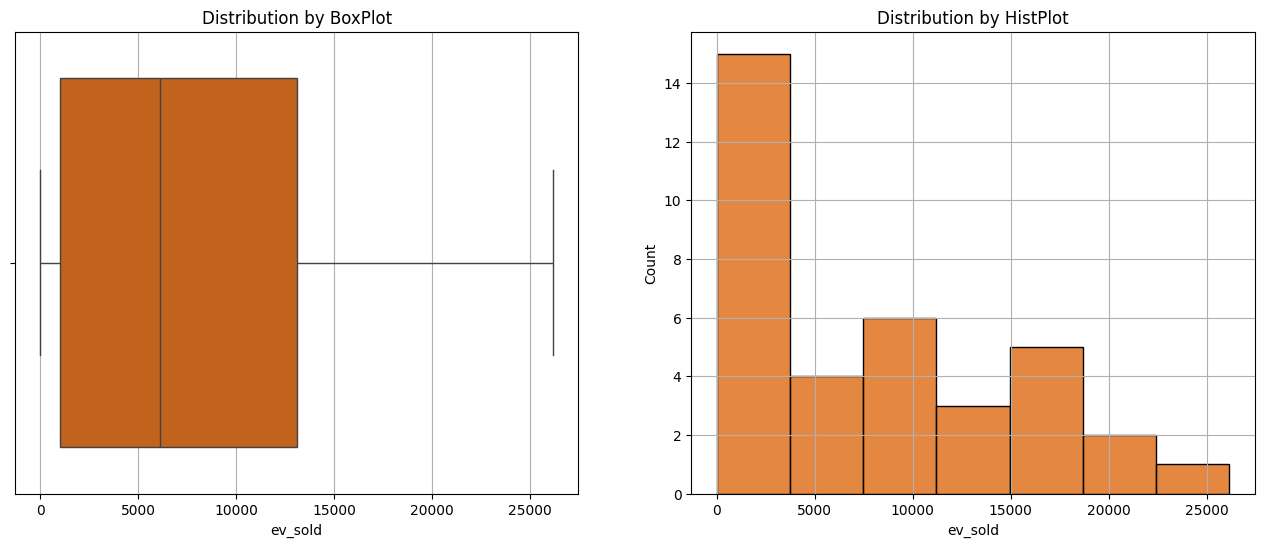

The Skew of 2-Wheelers Sold Data is: 0.72


In [159]:
# Create a BoxPlot and HistPlot to visualize distribution of 'ev_sold' and detect any outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=tvs_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=tvs_2_wh, x='ev_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# plot the chart
plt.show()
# Check the skewness of data in the "sold_quantity" column
print(f"The Skew of 2-Wheelers Sold Data is: {round(tvs_2_wh['ev_sold'].skew(), 2)}")

In [160]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
tvs_2_wh_sold_limit = check_outlier(tvs_2_wh, 'ev_sold')
# Display the required information
tvs_2_wh_sold_limit

,lower_bound,upper_bound,total_row,outlier_row,outliers_pct
0,-17138.375,31260.625,36,0,0.0


##### Handling Outliers

In [161]:
# handling outlier values and save resulting DataFrame
## code here

# display first few rows of new DataFrame as needed
# sales_by_states.head()

**Comment:**
- After thorough examination, I noticed that the outliers in the electric_vehicles_sold variable appeared due to differences between makers. Some makers have much higher sales than others, which caused the values from these makers to be considered outliers in the overall dataset. However, when analyzing each maker individually, these values are not outliers but normal sales levels for makers with higher sales.

For these reasons, I decided to retain and not handle these outliers in the analysis to ensure the data accurately reflects the distribution nature of each maker.

#### Restore Columns


In [162]:
# Display all column names
sales_by_makers.columns

Index(['date', 'vehicle_cat', 'maker', 'ev_sold'], dtype='object')

In [163]:
# Rename columns as needed
sales_by_makers.rename(columns={
    'vehicle_cat':'vehicle_category',
    'ev_sold':'electric_vehicles_sold'
}, inplace=True)
# Display all column names after the update
sales_by_makers.columns

Index(['date', 'vehicle_category', 'maker', 'electric_vehicles_sold'], dtype='object')

#### Sorting Data
Once you have cleaned your data, sorting is a necessary step to make it easier to analyze.

In [164]:
# Sắp xếp dữ liệu theo một cột
sales_by_makers = sales_by_makers.sort_values(by=['date','maker','vehicle_category'], ascending=True).reset_index(drop=True)

#### Fixing Data Types
Convert data types to appropriate form.

In [165]:
# Convert date column from string to datetime
sales_by_makers['date'] = pd.to_datetime(sales_by_makers['date'])

# Convert object columns to category to optimize memory usage and improve processing speed
sales_by_makers['maker'] = sales_by_makers['maker'].astype('category')
sales_by_makers['vehicle_category'] = sales_by_makers['vehicle_category'].astype('category')

C:\Users\PC\AppData\Local\Temp\ipykernel_7820\793210434.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_by_makers['date'] = pd.to_datetime(sales_by_makers['date'])


## Saving Cleaned Data

In [166]:
# sales by states
sales_by_states.to_csv("C:/Users/PC/Downloads/General_Motors-Provide_Insights_to_Chief_in_Electric_and_Hybrid_Vehicles/data/processed_data/electric_vehicle_sales_by_state.csv", index=False)
# sales by makers
sales_by_makers.to_csv("C:/Users/PC/Downloads/General_Motors-Provide_Insights_to_Chief_in_Electric_and_Hybrid_Vehicles/data/processed_data/electric_vehicle_sales_by_makers.csv", index=False)

# END!